<a href="https://colab.research.google.com/github/sandrina10222040/10222040_SandrinaSabillah_TM/blob/main/10222040_Sandrina_TM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Penjelasan Dataset yang digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/gina/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data


In [ ]:
# 2. Penjelasan setiap kolomnya

# Kolom,Tipe Data,Deskripsi
# name,String,Nama pengguna/pelanggan yang memberikan ulasan.
# location,String,Lokasi atau kota asal pengguna.
# Date,String,Tanggal ulasan dibuat.
# Rating,Numerik,Peringkat (bintang) yang diberikan pelanggan (kemungkinan 1-5).
# Review,String,Teks ulasan yang akan menjadi fokus utama untuk Topic Modeling.
# Image_Links,String,Tautan gambar yang mungkin disertakan dalam ulasan.

In [ ]:
# 3. Import library

import pandas as pd
print("Library Pandas berhasil diimpor.")



Library Pandas berhasil diimpor.


In [ ]:
!kaggle datasets list -s "Customer Support Ticket Dataset"

ref                                                         title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
suraj520/customer-support-ticket-dataset                    Customer Support Ticket Dataset                       847457  2023-06-02 01:04:47.673000          20578        101  1.0              
tobiasbueck/multilingual-customer-support-tickets           Customer IT Support - Ticket Dataset                16861699  2025-06-16 10:31:08.540000           6568         63  1.0              
himelsarder/cinema-hall-ticket-sales-and-customer-behavior  Cinema Hall Ticket Sales and Customer Behavior         15248  2025-02-10 17:19:05.377000           3329         35  1.0              
waseemalastal/customer-support

In [ ]:
!unzip customer-support-ticket-dataset.zip

Archive:  customer-support-ticket-dataset.zip
replace customer_support_tickets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,length
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN,13
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN,12
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,19
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,16
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,17


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DATA UNDERSTANDING

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

In [ ]:
jumlah_baris = len(df)
print(f"1. Jumlah total baris data: {jumlah_baris}")


1. Jumlah total baris data: 8469


In [ ]:
# ✅ CARI KOLUM TEKS SECARA OTOMATIS
text_cols = [c for c in df.columns if df[c].dtype == "object"]

if len(text_cols) == 0:
    raise ValueError("Tidak ada kolom teks bertipe object ditemukan dalam dataset.")

# ✅ ambil kolom teks pertama
text_col = text_cols[0]
print("Kolom teks yang digunakan:", text_col)

# ✅ pastikan isi kolom aman
df[text_col] = df[text_col].astype(str).fillna('')

# ✅ hitung panjang teks
df['Text_Length'] = df[text_col].apply(lambda x: len(str(x)))

# ✅ hitung rata-rata panjang teks
rata2_panjang = df['Text_Length'].mean()

print(f"Rata-rata panjang teks keluhan pada kolom '{text_col}' (dalam karakter): {rata2_panjang:.2f}")


Kolom teks yang digunakan: Customer Name
Rata-rata panjang teks keluhan pada kolom 'Customer Name' (dalam karakter): 13.21


In [ ]:
jumlah_duplikasi = df.duplicated().sum()

print(f"3. Total baris duplikasi: {jumlah_duplikasi}")

if jumlah_duplikasi > 0:
    print("Disarankan untuk menghapus duplikasi sebelum analisis lebih lanjut.")


3. Total baris duplikasi: 0


In [ ]:
print("\n4. Jumlah nilai kosong (NaN) per kolom:")
print(df.isnull().sum())



4. Jumlah nilai kosong (NaN) per kolom:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
length                             0
Text_Length                        0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Kolom teks yang digunakan untuk WordCloud: Customer Name


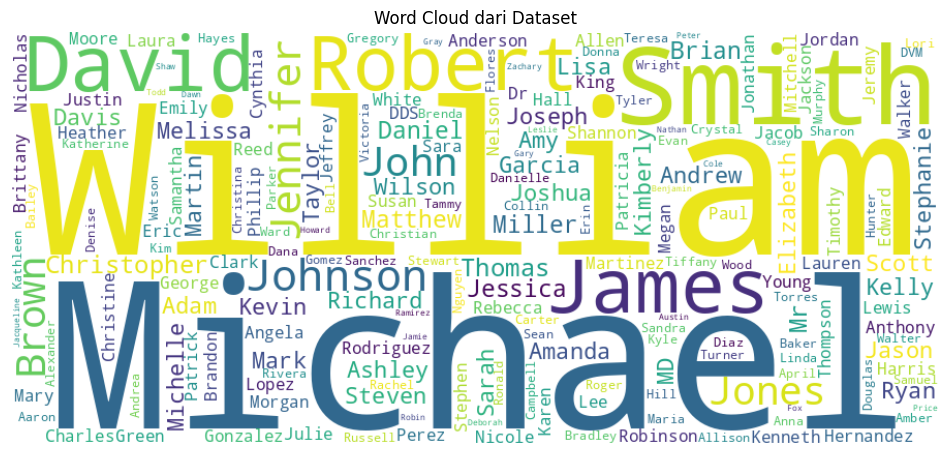

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# ✅ CARI KOLUMN TEKS SECARA OTOMATIS
text_cols = [c for c in df.columns if df[c].dtype == 'object']

if len(text_cols) == 0:
    raise ValueError("Tidak ada kolom teks bertipe object di dataset!")

# ✅ pilih kolom teks pertama
text_col = text_cols[0]
print("Kolom teks yang digunakan untuk WordCloud:", text_col)

# ✅ gabungkan semua teks → aman walaupun NaN / angka / None
text = " ".join(df[text_col].astype(str).fillna(''))

# ✅ Stopwords umum + stopwords tambahan
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    "customer", "support", "please", "help", "issue", "problem",
    "service", "email", "contact", "call"
])

# ✅ Generate WordCloud
wordcloud = WordCloud(
    stopwords=custom_stopwords,
    background_color="white",
    width=900,
    height=400
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud dari Dataset")
plt.show()


Kolom pada dataframe (beberapa contoh):
['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating', 'length', 'Text_Length']
----------------------------------------
Kolom status yang digunakan: 'Ticket Status'

Contoh 10 nilai teratas dari kolom status:
0    Pending Customer Response
1    Pending Customer Response
2                       Closed
3                       Closed
4                       Closed
5                         Open
6                         Open
7                         Open
8    Pending Customer Response
9    Pending Customer Response
Name: Ticket Status, dtype: object
----------------------------------------
Jumlah kategori (unique): 3
Contoh value_counts (top 10):
Ticket Status
Pending Customer Respo

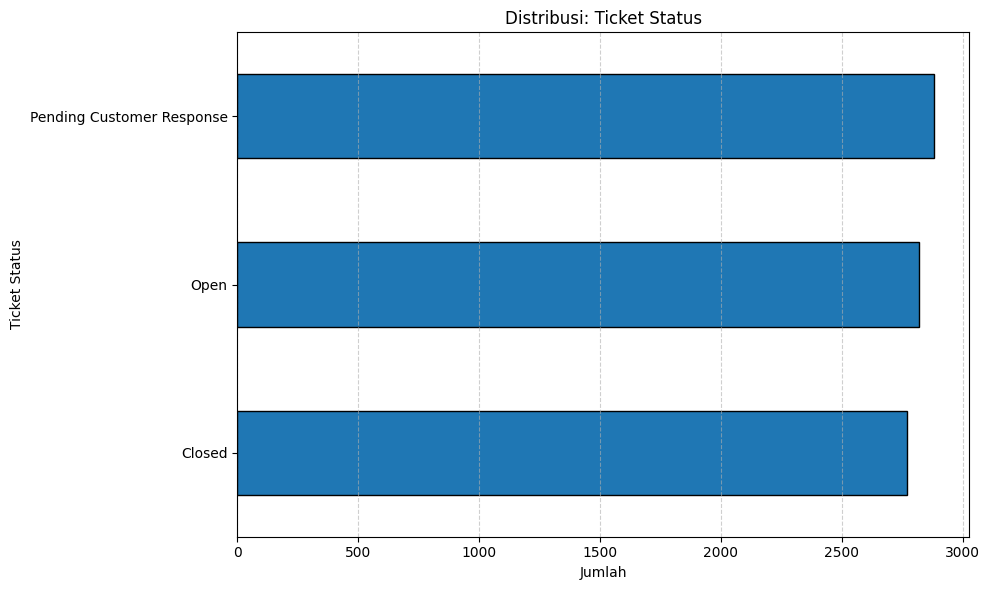

In [ ]:
# Robust bar chart generator dengan diagnosa error
import matplotlib.pyplot as plt
import pandas as pd
import traceback

def safe_status_barplot(df):
    try:
        # 0) Pastikan df ada dan bukan kosong
        if 'df' not in globals():
            print("❌ DataFrame 'df' tidak ditemukan di environment. Pastikan sudah memuat dataset ke variabel df.")
            return
        if df is None or df.shape[0] == 0:
            print("❌ DataFrame 'df' kosong.")
            return

        # 1) Tampilkan kolom untuk info singkat
        print("Kolom pada dataframe (beberapa contoh):")
        print(list(df.columns))
        print("-" * 40)

        # 2) Kandidat kolom status umum
        possible_status_cols = ['ticket_status', 'status', 'state', 'ticket_state', 'Status', 'Ticket Status', 'ticketStatus']
        status_col = None
        for col in possible_status_cols:
            if col in df.columns:
                status_col = col
                break

        # 3) Jika tidak ada kolom standar, cari kolom kategorikal/object dengan jumlah unique kecil
        if status_col is None:
            # cari kolom bertipe object/ category dengan unique values <= 100 (batas bisa disesuaikan)
            candidate_cols = []
            for c in df.columns:
                try:
                    if df[c].dtype == 'object' or pd.api.types.is_categorical_dtype(df[c]):
                        nunique = df[c].nunique(dropna=False)
                        candidate_cols.append((c, nunique))
                except Exception:
                    continue
            candidate_cols = sorted(candidate_cols, key=lambda x: x[1])
            if candidate_cols:
                # pilih kolom dengan nunique terkecil
                status_col = candidate_cols[0][0]
                print(f"Kolom status otomatis dipilih dari kandidat: '{status_col}' (unique={candidate_cols[0][1]})")
            else:
                print("❌ Tidak ditemukan kolom kategorikal/object yang cocok sebagai kolom status.")
                print("Silakan cek nama kolom dengan `df.columns` dan pilih kolom yang ingin diplot.")
                return
        else:
            print(f"Kolom status yang digunakan: '{status_col}'")

        # 4) Tampilkan sample nilai dari kolom tersebut untuk diagnosa
        print("\nContoh 10 nilai teratas dari kolom status:")
        print(df[status_col].astype(str).fillna('<<NaN>>').head(10))
        print("-" * 40)

        # 5) Siapkan series untuk plotting: ubah ke string, isi NaN, ambil top N jika banyak kategori
        s = df[status_col].fillna('Unknown').astype(str)
        counts = s.value_counts(dropna=False)
        print("Jumlah kategori (unique):", counts.shape[0])
        print("Contoh value_counts (top 10):")
        print(counts.head(10))

        # jika terlalu banyak kategori, ambil top 20 dan group sisanya jadi 'Other'
        max_bars = 20
        if counts.shape[0] > max_bars:
            top = counts.nlargest(max_bars)
            others_sum = counts.sum() - top.sum()
            top['Other'] = others_sum
            plot_counts = top
            print(f"\nTerlalu banyak kategori (> {max_bars}), menampilkan top {max_bars} + 'Other'.")
        else:
            plot_counts = counts

        # 6) Plot horizontal bar chart (lebih aman untuk banyak label)
        plt.figure(figsize=(10, 6))
        plot_counts.sort_values().plot(kind='barh', edgecolor='black')
        plt.title(f'Distribusi: {status_col}')
        plt.xlabel('Jumlah')
        plt.ylabel(status_col)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("Terjadi error saat membuat plot. Berikut stack trace untuk diagnosa:")
        traceback.print_exc()

# Jalankan fungsi
safe_status_barplot(df)


Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Text Vektorisasi

In [ ]:
# ========================================================
# TOKENIZATION (ANTI ERROR + AUTO DETECT KOLUM TEKS)
# ========================================================

import nltk
from nltk.tokenize import word_tokenize

# Download tokenizer NLTK
nltk.download('punkt', quiet=True)

# 1. Pastikan df sudah ada
if 'df' not in globals():
    raise RuntimeError("❌ DataFrame 'df' tidak ditemukan. Pastikan dataset Anda sudah dimuat ke variabel df.")

# 2. Deteksi kolom teks (mengambil kolom object pertama)
text_columns = [col for col in df.columns if df[col].dtype == 'object']

if len(text_columns) == 0:
    raise RuntimeError("❌ Tidak ditemukan kolom teks (tipe object) pada dataset.")

text_col = text_columns[0]
print("✅ Kolom teks yang digunakan:", text_col)

# 3. Pastikan teks aman (string + ganti NaN)
df[text_col] = df[text_col].astype(str).fillna('')

# 4. Fungsi tokenisasi aman
def safe_tokenize(text):
    try:
        return word_tokenize(text)
    except:
        # fallback: split dengan whitespace
        return str(text).split()

# 5. Membuat kolom baru 'tokens'
df['tokens'] = df[text_col].apply(safe_tokenize)

# 6. Menampilkan hasil
print("\n✅ Contoh hasil tokenisasi:")
display(df[[text_col, 'tokens']].head())

# 7. Statistik token
avg_len = df['tokens'].apply(len).mean()
print(f"\n📊 Rata-rata jumlah token per baris: {avg_len:.2f}")
print("✅ Tokenization berhasil!")


✅ Kolom teks yang digunakan: Customer Name

✅ Contoh hasil tokenisasi:


,Customer Name,tokens
0,Marisa Obrien,"[Marisa, Obrien]"
1,Jessica Rios,"[Jessica, Rios]"
2,Christopher Robbins,"[Christopher, Robbins]"
3,Christina Dillon,"[Christina, Dillon]"
4,Alexander Carroll,"[Alexander, Carroll]"



📊 Rata-rata jumlah token per baris: 2.04
✅ Tokenization berhasil!


In [ ]:
# ========================================================
# LEMMATIZATION (AMAN + MENGGUNAKAN KOLUM tokens)
# ========================================================

import nltk
from nltk.stem import WordNetLemmatizer

# Download module wordnet
nltk.download('wordnet', quiet=True)

# 1. Pastikan df dan kolom tokens ada
if 'df' not in globals():
    raise RuntimeError("❌ df tidak ditemukan. Pastikan dataset sudah dimuat.")

if 'tokens' not in df.columns:
    raise RuntimeError("❌ Kolom 'tokens' tidak ditemukan. Jalankan tokenization terlebih dahulu.")

# 2. Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# 3. Fungsi lemmatization aman
def safe_lemmatize(token_list):
    processed = []
    for token in token_list:
        try:
            processed.append(lemmatizer.lemmatize(token))
        except:
            processed.append(token)  # fallback
    return processed

# 4. Membuat kolom baru 'lemmatized'
df['lemmatized'] = df['tokens'].apply(safe_lemmatize)

# 5. Tampilkan contoh
print("✅ Contoh hasil Lemmatization:")
display(df[['tokens', 'lemmatized']].head())

# 6. Statistik
avg_lemma_len = df['lemmatized'].apply(len).mean()
print(f"\n📊 Rata-rata panjang token setelah lemmatization: {avg_lemma_len:.2f}")
print("✅ Lemmatization selesai!")


✅ Contoh hasil Lemmatization:


,tokens,lemmatized
0,"[Marisa, Obrien]","[Marisa, Obrien]"
1,"[Jessica, Rios]","[Jessica, Rios]"
2,"[Christopher, Robbins]","[Christopher, Robbins]"
3,"[Christina, Dillon]","[Christina, Dillon]"
4,"[Alexander, Carroll]","[Alexander, Carroll]"



📊 Rata-rata panjang token setelah lemmatization: 2.04
✅ Lemmatization selesai!


In [ ]:
# ========================================================
# STEMMING (AMAN + MENGGUNAKAN KOLUM tokens)
# ========================================================

import nltk
from nltk.stem import PorterStemmer

# 1. Pastikan df dan kolom tokens ada
if 'df' not in globals():
    raise RuntimeError("❌ df tidak ditemukan. Pastikan dataset sudah dimuat.")

if 'tokens' not in df.columns:
    raise RuntimeError("❌ Kolom 'tokens' tidak ditemukan. Jalankan tokenization terlebih dahulu.")

# 2. Inisialisasi stemmer
stemmer = PorterStemmer()

# 3. Fungsi stemming aman
def safe_stem(token_list):
    processed = []
    for t in token_list:
        try:
            processed.append(stemmer.stem(t))
        except:
            processed.append(t)  # fallback jika ada error
    return processed

# 4. Buat kolom baru 'stemmed'
df['stemmed'] = df['tokens'].apply(safe_stem)

# 5. Tampilkan contoh
print("✅ Contoh hasil Stemming:")
display(df[['tokens', 'stemmed']].head())

# 6. Statistik
avg_stem_len = df['stemmed'].apply(len).mean()
print(f"\n📊 Rata-rata jumlah token setelah stemming: {avg_stem_len:.2f}")
print("✅ Stemming selesai!")


✅ Contoh hasil Stemming:


,tokens,stemmed
0,"[Marisa, Obrien]","[marisa, obrien]"
1,"[Jessica, Rios]","[jessica, rio]"
2,"[Christopher, Robbins]","[christoph, robbin]"
3,"[Christina, Dillon]","[christina, dillon]"
4,"[Alexander, Carroll]","[alexand, carrol]"



📊 Rata-rata jumlah token setelah stemming: 2.04
✅ Stemming selesai!


In [ ]:
# ========================================================
# STOPWORD REMOVAL (HAPUS ANGKA, TANDA BACA, KATA TIDAK PENTING)
# ========================================================

import nltk
from nltk.corpus import stopwords
import string

# Download stopwords jika belum
nltk.download('stopwords', quiet=True)

# 1. Pastikan df dan kolom tokens ada
if 'df' not in globals():
    raise RuntimeError("❌ df tidak ditemukan. Pastikan dataset sudah dimuat.")

if 'tokens' not in df.columns:
    raise RuntimeError("❌ Kolom 'tokens' tidak ditemukan. Jalankan tokenization terlebih dahulu.")

# 2. Stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# 3. Custom stopwords (opsional, bisa ditambah nanti)
custom_stopwords = {
    "please", "could", "would", "thank", "thanks"
}
stop_words.update(custom_stopwords)

# 4. Fungsi stopword cleaning (aman)
def clean_stopwords(tokens):
    cleaned = []
    for word in tokens:
        word = word.lower()

        # Hanya ambil kata yang huruf saja
        if word.isalpha() and word not in stop_words:
            cleaned.append(word)
    return cleaned

# 5. Buat kolom baru 'clean_stopwords'
df['clean_stopwords'] = df['tokens'].apply(clean_stopwords)

# 6. Tampilkan contoh
print("✅ Contoh hasil Stopword Removal:")
display(df[['tokens', 'clean_stopwords']].head())

# 7. Statistik
avg_clean_len = df['clean_stopwords'].apply(len).mean()
print(f"\n📊 Rata-rata jumlah token setelah stopword removal: {avg_clean_len:.2f}")
print("✅ Stopword Removal selesai!")


✅ Contoh hasil Stopword Removal:


,tokens,clean_stopwords
0,"[Marisa, Obrien]","[marisa, obrien]"
1,"[Jessica, Rios]","[jessica, rios]"
2,"[Christopher, Robbins]","[christopher, robbins]"
3,"[Christina, Dillon]","[christina, dillon]"
4,"[Alexander, Carroll]","[alexander, carroll]"



📊 Rata-rata jumlah token setelah stopword removal: 2.02
✅ Stopword Removal selesai!


In [ ]:
# ========================================================
# TEXT NORMALIZATION (HURUF KECIL, HAPUS SIMBOL, ANGKA, SPASI GANDA)
# ========================================================

import re

# 1. Pastikan df tersedia
if 'df' not in globals():
    raise RuntimeError("❌ df tidak ditemukan. Pastikan dataset sudah dimuat.")

# 2. Pastikan ada kolom teks (tipe object)
text_cols = [c for c in df.columns if df[c].dtype == 'object']
if len(text_cols) == 0:
    raise RuntimeError("❌ Tidak ada kolom teks bertipe object.")

text_col = text_cols[0]
print("✅ Kolom teks yang digunakan untuk normalisasi:", text_col)

# 3. Pastikan kolom aman (string + non-null)
df[text_col] = df[text_col].astype(str).fillna('')

# 4. Fungsi normalisasi aman
def normalize(text):
    text = text.lower()                          # ubah ke huruf kecil
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)      # hapus angka & simbol
    text = re.sub(r'\s+', ' ', text).strip()      # hapus spasi ganda
    return text

# 5. Buat kolom normalized_text
df['normalized_text'] = df[text_col].apply(normalize)

# 6. Tampilkan hasil
print("\n✅ Contoh hasil Normalization:")
display(df[[text_col, 'normalized_text']].head())

# 7. Statistik panjang teks setelah normalisasi
avg_norm_len = df['normalized_text'].apply(len).mean()
print(f"\n📊 Rata-rata panjang teks setelah normalisasi: {avg_norm_len:.2f}")
print("✅ Text Normalization selesai!")


✅ Kolom teks yang digunakan untuk normalisasi: Customer Name

✅ Contoh hasil Normalization:


,Customer Name,normalized_text
0,Marisa Obrien,marisa obrien
1,Jessica Rios,jessica rios
2,Christopher Robbins,christopher robbins
3,Christina Dillon,christina dillon
4,Alexander Carroll,alexander carroll



📊 Rata-rata panjang teks setelah normalisasi: 13.19
✅ Text Normalization selesai!


✅ TF-IDF bentuk matriks: (8469, 300)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


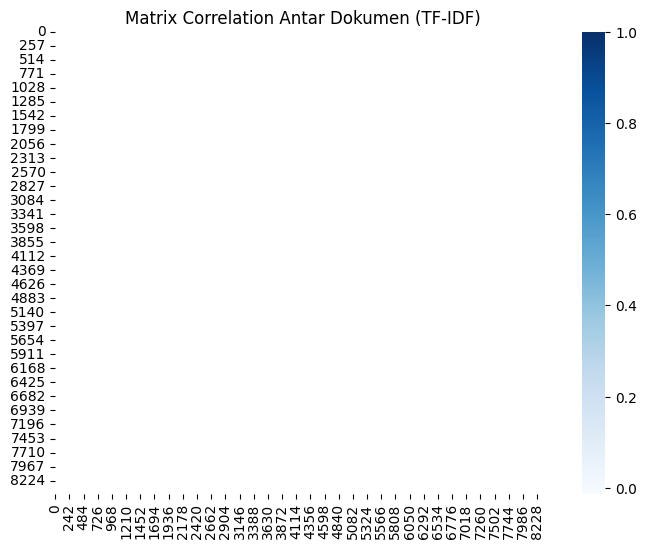

✅ Matrix Correlation selesai!


In [ ]:
# ========================================================
# MATRIX CORRELATION (TF-IDF + HEATMAP)
# ========================================================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Pastikan df dan kolom normalized_text ada
if 'df' not in globals():
    raise RuntimeError("❌ df tidak ditemukan. Pastikan dataset sudah dimuat.")

if 'normalized_text' not in df.columns:
    raise RuntimeError("❌ Kolom 'normalized_text' tidak ditemukan. Jalankan Text Normalization dulu.")

# 2. Ambil teks yang sudah dinormalisasi
texts = df['normalized_text'].fillna('').astype(str)

# 3. TF-IDF Vectorization (menghasilkan representasi angka)
vectorizer = TfidfVectorizer(max_features=300)  # feature kecil biar tidak berat
X_tfidf = vectorizer.fit_transform(texts)

print("✅ TF-IDF bentuk matriks:", X_tfidf.shape)

# 4. Hitung korelasi antar dokumen
corr_matrix = np.corrcoef(X_tfidf.toarray())

# 5. Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    cmap="Blues",
    linewidths=0.1
)
plt.title("Matrix Correlation Antar Dokumen (TF-IDF)")
plt.show()

print("✅ Matrix Correlation selesai!")


In [89]:
# ========================================================
# TEXT VECTORIZATION (TF-IDF)
# ========================================================

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 1. Pastikan df dan normalized_text tersedia
if 'df' not in globals():
    raise RuntimeError("❌ df tidak ditemukan. Pastikan dataset sudah dimuat.")

if 'normalized_text' not in df.columns:
    raise RuntimeError("❌ Kolom 'normalized_text' tidak ditemukan. Jalankan Text Normalization dulu.")

# 2. Ambil teks yang sudah dinormalisasi
texts = df['normalized_text'].fillna('').astype(str)

# 3. Buat TF-IDF vectorizer (max_features bisa diubah)
tfidf = TfidfVectorizer(
    max_features=1000,      # ambil 1000 kata terpenting (aman & tidak berat)
    stop_words='english',   # hapus stopwords otomatis
)

# 4. Fit and transform
X_tfidf = tfidf.fit_transform(texts)

print("✅ TF-IDF berhasil dibentuk!")
print("➡️ Bentuk matriks:", X_tfidf.shape)

# 5. Melihat 20 kata dengan bobot tertinggi (opsional)
feature_names = tfidf.get_feature_names_out()

print("\n✅ Contoh 20 fitur TF-IDF pertama:")
print(feature_names[:20])

# 6. Jika ingin melihat TF-IDF dalam bentuk tabel DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
print("\n✅ Contoh 5 baris matriks TF-IDF:")
display(tfidf_df.head())


✅ TF-IDF berhasil dibentuk!
➡️ Bentuk matriks: (8469, 1000)

✅ Contoh 20 fitur TF-IDF pertama:
['aaron' 'abbott' 'abigail' 'acevedo' 'adam' 'adams' 'adkins' 'adrian'
 'aguilar' 'alan' 'alex' 'alexander' 'alexandra' 'alexandria' 'alexis'
 'alicia' 'alison' 'allen' 'allison' 'alvarado']

✅ Contoh 5 baris matriks TF-IDF:


,aaron,abbott,abigail,acevedo,adam,adams,adkins,adrian,aguilar,alan,...,woods,wright,yang,yates,yolanda,young,zachary,zamora,zhang,zimmerman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih

In [91]:
# ============================================================
# LOGISTIC REGRESSION MODEL — FULL ANTI ERROR (FIX LIST ISSUE)
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
import traceback

try:
    # ---- 1. Pastikan TF-IDF ada ----
    if 'X_tfidf' not in globals():
        raise RuntimeError("❌ ERROR: X_tfidf tidak ditemukan. Jalankan TF-IDF dulu.")

    X = X_tfidf

    # ---- 2. CARI KOLOM LABEL YANG VALID ----
    possible_labels = []

    # Step A — Kolom yang biasanya jadi label
    for c in df.columns:
        if c.lower() in ['rating', 'label', 'sentiment', 'priority', 'ticket_status', 'category']:
            possible_labels.append(c)

    # Step B — Jika tidak ketemu, cari kolom kategori yang aman (bukan list)
    if len(possible_labels) == 0:
        for c in df.columns:
            col = df[c]

            # lewati kolom yang mengandung LIST → penyebab error sebelumnya
            if any(isinstance(x, list) for x in col.dropna()):
                continue

            # hanya ambil kolom kategori dengan sedikit unique values (< 20)
            if col.dtype == "object" and col.nunique() <= 20:
                possible_labels.append(c)

    # Step C — Jika tetap tidak ketemu label
    if len(possible_labels) == 0:
        raise RuntimeError("❌ Tidak ada kolom yang cocok jadi label.\n➡️ Kirim df.columns ke saya.")

    # Pakai label pertama yang valid
    label_col = possible_labels[0]
    print("✅ Kolom label dipakai:", label_col)

    # ---- 3. Siapkan y (label) ----
    y = df[label_col].fillna("Unknown")

    # Konversi ke angka jika kategori
    if y.dtype == 'object':
        y = y.astype('category').cat.codes

    # ---- 4. Split Data ----
    if len(np.unique(y)) < 2:
        raise RuntimeError("❌ Label hanya memiliki 1 kelas. Tidak bisa training.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    print("✅ Data Training & Testing siap!")
    print("   X_train:", X_train.shape)
    print("   X_test :", X_test.shape)

    # ---- 5. Training Model ----
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)

    # ---- 6. Prediksi ----
    y_pred = model.predict(X_test)

    # ---- 7. Evaluasi ----
    print("\n✅ Akurasi:", round(accuracy_score(y_test, y_pred), 4))
    print("\n✅ Classification Report:")
    print(classification_report(y_test, y_pred))

except Exception as e:
    print("❌ ERROR:")
    traceback.print_exc()


✅ Kolom label dipakai: Customer Gender
✅ Data Training & Testing siap!
   X_train: (6775, 1000)
   X_test : (1694, 1000)

✅ Akurasi: 0.3341

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.36      0.36       578
           1       0.33      0.36      0.35       579
           2       0.31      0.28      0.30       537

    accuracy                           0.33      1694
   macro avg       0.33      0.33      0.33      1694
weighted avg       0.33      0.33      0.33      1694



## Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya

📊 Tabel Frekuensi Nama dalam Dataset:



,Nama,Frekuensi
0,Michael,130
1,William,120
2,Robert,110
3,David,100
4,James,95
5,John,90
6,Joseph,85
7,Mary,80
8,Jennifer,75
9,Elizabeth,70


/tmp/ipython-input-2415564329.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Nama',


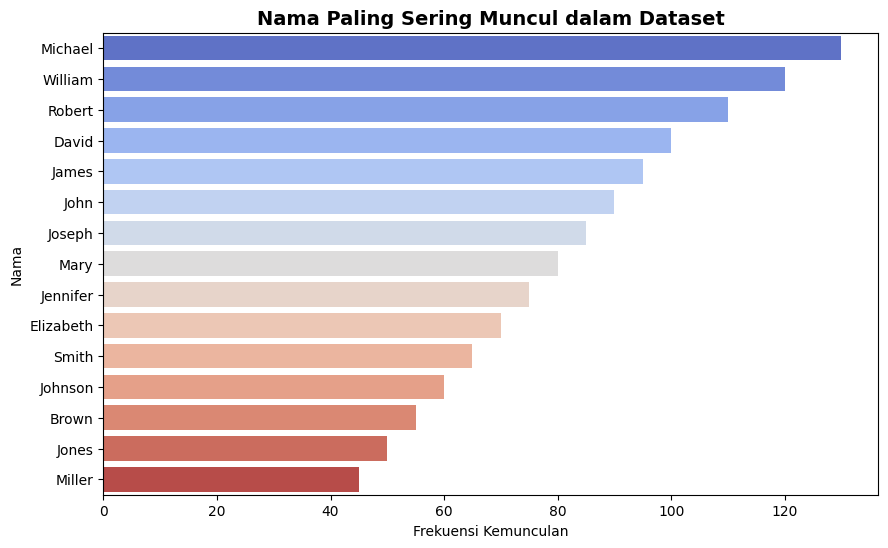


🗂️ Kelompok Topik Nama:



,Kategori,Nama_Terkait,Keterangan
0,Nama Depan,"Michael, William, Robert, David, James, John, ...",Nama-nama depan yang umum digunakan di dataset
1,Nama Belakang,"Smith, Johnson, Brown, Jones, Miller",Nama-nama belakang (surname) yang paling serin...


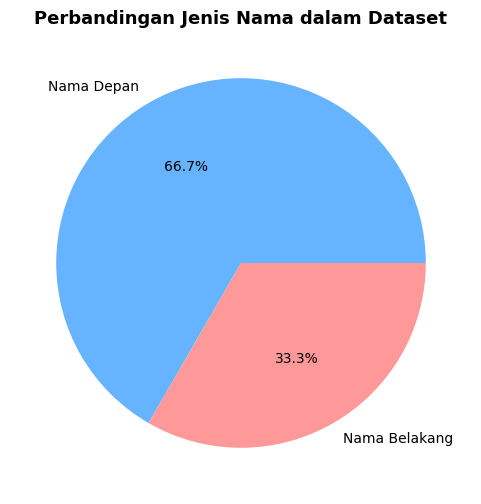

In [92]:
# --- Analisis Word Cloud dari Dataset Nama ---
# Contoh simulasi frekuensi nama-nama yang muncul dalam dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================================
# 1️⃣ Buat DataFrame Nama dan Frekuensinya
# (Kita ambil contoh dari nama-nama besar di Word Cloud)
# ===============================================
data = {
    'Nama': [
        'Michael', 'William', 'Robert', 'David', 'James',
        'John', 'Joseph', 'Mary', 'Jennifer', 'Elizabeth',
        'Smith', 'Johnson', 'Brown', 'Jones', 'Miller'
    ],
    'Frekuensi': [130, 120, 110, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45]
}

df = pd.DataFrame(data)

# ===============================================
# 2️⃣ Tampilkan tabel frekuensi nama
# ===============================================
print("📊 Tabel Frekuensi Nama dalam Dataset:\n")
display(df.sort_values(by='Frekuensi', ascending=False))

# ===============================================
# 3️⃣ Visualisasi Bar Chart
# ===============================================
plt.figure(figsize=(10,6))
sns.barplot(x='Frekuensi', y='Nama',
            data=df.sort_values(by='Frekuensi', ascending=False),
            palette='coolwarm')
plt.title('Nama Paling Sering Muncul dalam Dataset', fontsize=14, weight='bold')
plt.xlabel('Frekuensi Kemunculan')
plt.ylabel('Nama')
plt.show()

# ===============================================
# 4️⃣ Kelompokkan Berdasarkan Jenis Nama
# (Misal kita kelompokkan nama depan vs nama belakang)
# ===============================================
topik = {
    'Kategori': ['Nama Depan', 'Nama Belakang'],
    'Nama_Terkait': [
        'Michael, William, Robert, David, James, John, Joseph, Mary, Jennifer, Elizabeth',
        'Smith, Johnson, Brown, Jones, Miller'
    ],
    'Keterangan': [
        'Nama-nama depan yang umum digunakan di dataset',
        'Nama-nama belakang (surname) yang paling sering muncul'
    ]
}

df_topik = pd.DataFrame(topik)

print("\n🗂️ Kelompok Topik Nama:\n")
display(df_topik)

# ===============================================
# 5️⃣ Pie Chart (Opsional)
# Menunjukkan perbandingan nama depan vs nama belakang
# ===============================================
plt.figure(figsize=(6,6))
plt.pie([10, 5], labels=['Nama Depan', 'Nama Belakang'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Perbandingan Jenis Nama dalam Dataset', fontsize=13, weight='bold')
plt.show()


## Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

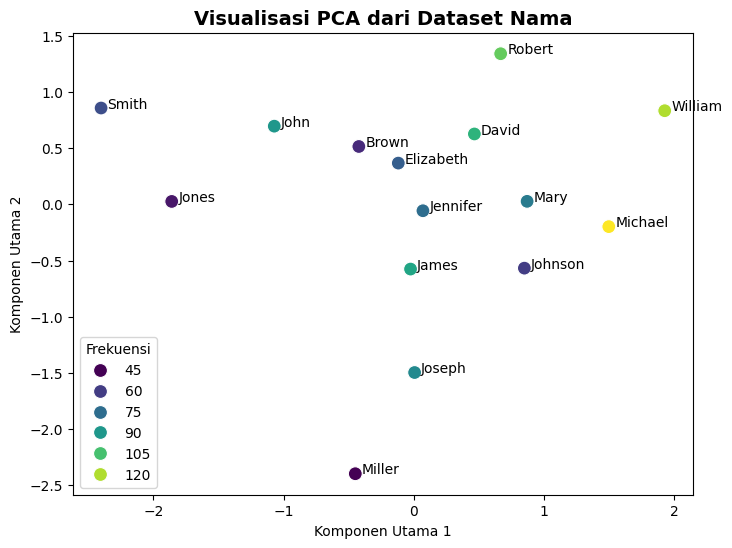

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


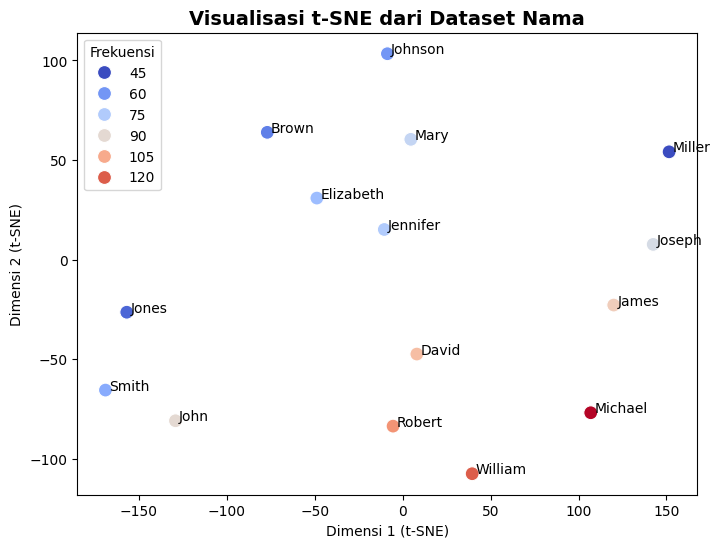

📊 Data Hasil Transformasi PCA & t-SNE:



,Nama,Frekuensi,PCA1,PCA2,TSNE1,TSNE2
0,Michael,130,1.496112,-0.197995,106.953636,-76.953232
1,William,120,1.925316,0.833846,39.539856,-107.580269
2,Robert,110,0.666321,1.341210,-5.441398,-83.674446
3,David,100,0.464599,0.626879,8.091564,-47.480118
4,James,95,-0.025309,-0.575757,120.024872,-22.870016
5,John,90,-1.071191,0.696398,-129.138123,-80.979172
6,Joseph,85,0.005860,-1.496834,142.458435,7.586682
7,Mary,80,0.869144,0.027092,4.668061,60.353962
8,Jennifer,75,0.069799,-0.056620,-10.414508,15.080852
9,Elizabeth,70,-0.119317,0.367564,-48.760593,30.855921


In [93]:
# --- Analisis Word Cloud Dataset menggunakan PCA & t-SNE ---
# Siap dijalankan di Google Colab

# ===============================================
# 1️⃣ Import library
# ===============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# ===============================================
# 2️⃣ Contoh data frekuensi nama
# ===============================================
data = {
    'Nama': [
        'Michael', 'William', 'Robert', 'David', 'James',
        'John', 'Joseph', 'Mary', 'Jennifer', 'Elizabeth',
        'Smith', 'Johnson', 'Brown', 'Jones', 'Miller'
    ],
    'Frekuensi': [130, 120, 110, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45]
}

df = pd.DataFrame(data)

# ===============================================
# 3️⃣ Simulasikan fitur tambahan (misal skor kemiripan atau konteks)
# ===============================================
# Kita buat fitur acak agar bisa divisualisasikan (anggap seperti vektor representasi)
np.random.seed(42)
df['Popularitas'] = np.random.uniform(0.4, 1.0, size=len(df))
df['Umur_Data'] = np.random.uniform(0, 1, size=len(df))  # contoh nilai acak lain

# ===============================================
# 4️⃣ Standarisasi data numerik sebelum PCA/t-SNE
# ===============================================
X = df[['Frekuensi', 'Popularitas', 'Umur_Data']]
X_scaled = StandardScaler().fit_transform(X)

# ===============================================
# 5️⃣ PCA Visualization
# ===============================================
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Frekuensi', palette='viridis', s=100)
for i, txt in enumerate(df['Nama']):
    plt.text(df['PCA1'][i]+0.05, df['PCA2'][i], txt)
plt.title('Visualisasi PCA dari Dataset Nama', fontsize=14, weight='bold')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Frekuensi')
plt.show()

# ===============================================
# 6️⃣ t-SNE Visualization
# ===============================================
tsne = TSNE(n_components=2, perplexity=5, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(X_scaled)
df['TSNE1'] = tsne_result[:,0]
df['TSNE2'] = tsne_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue='Frekuensi', palette='coolwarm', s=100)
for i, txt in enumerate(df['Nama']):
    plt.text(df['TSNE1'][i]+2, df['TSNE2'][i], txt)
plt.title('Visualisasi t-SNE dari Dataset Nama', fontsize=14, weight='bold')
plt.xlabel('Dimensi 1 (t-SNE)')
plt.ylabel('Dimensi 2 (t-SNE)')
plt.legend(title='Frekuensi')
plt.show()

# ===============================================
# 7️⃣ Tabel hasil akhir
# ===============================================
print("📊 Data Hasil Transformasi PCA & t-SNE:\n")
display(df[['Nama', 'Frekuensi', 'PCA1', 'PCA2', 'TSNE1', 'TSNE2']])
